<a href="https://colab.research.google.com/github/jamilly-b/curso-machine-learning/blob/main/Aulas/Aula13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalização de pixels entre 0 e 1

train_images, test_images = train_images / 255.0, test_images / 255.0

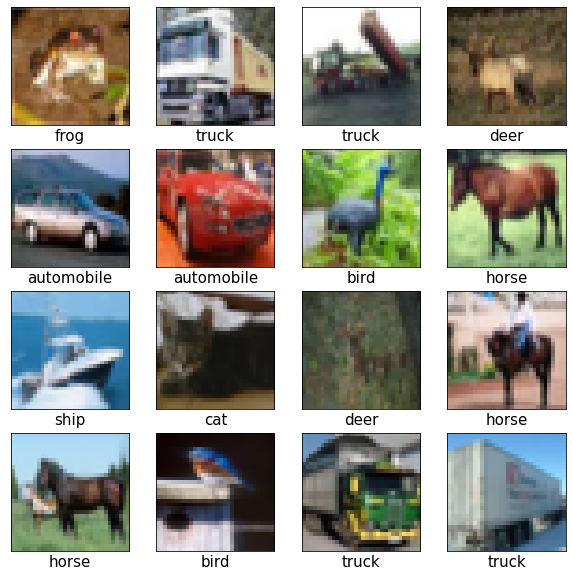

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap= plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]], fontsize = 15)
plt.show()

In [9]:
model = models.Sequential(name = 'CNN-CIFAR10')
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(63, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 63)          36351     
                                                                 
 flatten (Flatten)           (None, 1008)              

In [22]:
model.compile(optimizer= 'adam', \
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), \
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7784 - accuracy: 0.7284 - val_loss: 0.8707 - val_accuracy: 0.6942
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7353 - accuracy: 0.7438 - val_loss: 0.8695 - val_accuracy: 0.7010
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6941 - accuracy: 0.7579 - val_loss: 0.8997 - val_accuracy: 0.6934
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6639 - accuracy: 0.7670 - val_loss: 0.8991 - val_accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6300 - accuracy: 0.7785 - val_loss: 0.8841 - val_accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5990 - accuracy: 0.7907 - val_loss: 0.8775 - val_accuracy: 0.7058
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5686 - accuracy: 0.8006 - val_loss: 0.8900 -

<function matplotlib.pyplot.show(*args, **kw)>

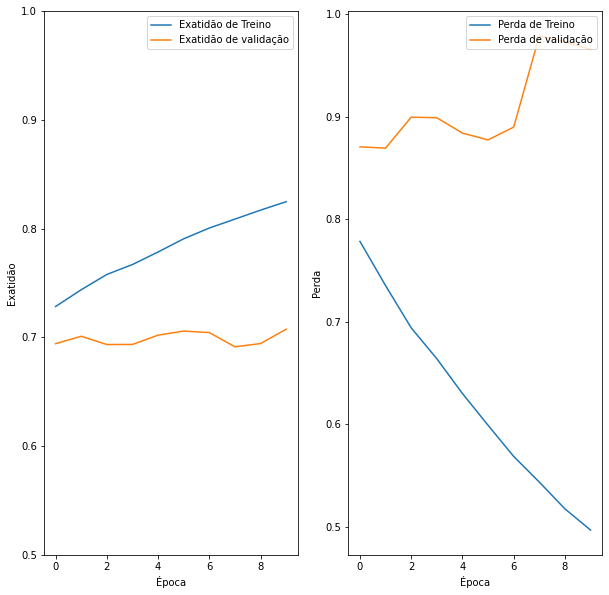

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Exatidão de Treino')
plt.plot(history.history['val_accuracy'], label='Exatidão de validação')
plt.xlabel('Época')
plt.ylabel('Exatidão')
plt.ylim([0.5, 1])
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc = 'upper right')

plt.show


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 4s 12ms/step


In [19]:
import numpy as np

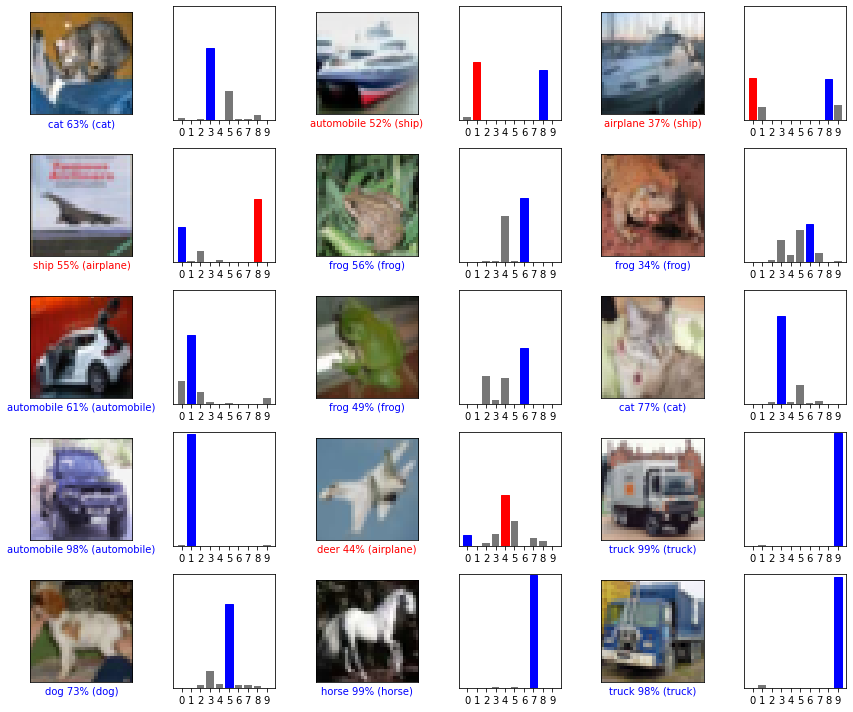

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i], test_labels)
plt.tight_layout()
plt.show()